In [64]:
# for manipulation
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
# for interactiveness
from ipywidgets import interact

In [65]:
# lets read data
d = pd.read_csv('Desktop/student.csv')
d.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [66]:
print("shape of dataset:", d.shape)

shape of dataset: (25, 2)


In [67]:
# checking the missing values in the dataset 
d.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [68]:
d['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [69]:
X = d.iloc[:, :-1].values  
y = d.iloc[:, 1].values  

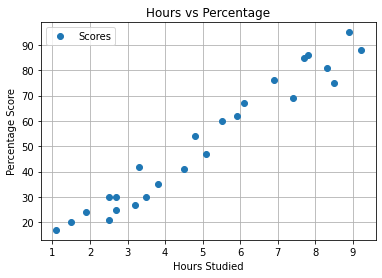

In [70]:
# Plotting the distribution of scores
d.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


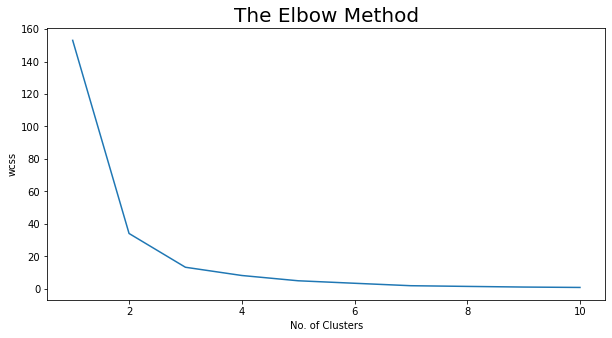

In [71]:
# lets determine the optimum number of clusters within the dataset
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,5)
wcss = []
for i in range(1,11):
    a = KMeans(n_clusters = i, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
    a.fit(X)
    wcss.append(a.inertia_)
    
# lets plot the results
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [72]:
# lets create training and testing sets for validation of results
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print("the shape of x train:" , X_train.shape)
print("the shape of x test]:" , X_test.shape)
print("the shape of y train:" , y_train.shape)
print("the shape of y test:" , y_test.shape)

the shape of x train: (20, 1)
the shape of x test]: (5, 1)
the shape of y train: (20,)
the shape of y test: (5,)


In [73]:
# lets create a predictive model
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)

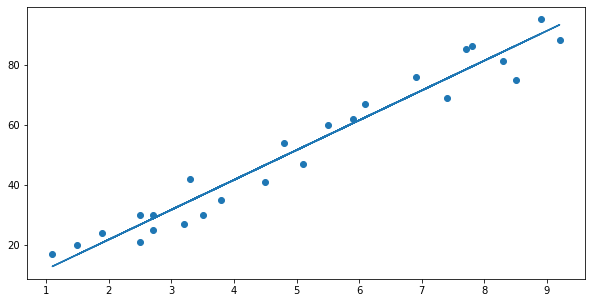

In [74]:
l = ml.coef_*X+ml.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, l);
plt.show()

In [75]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred = ml.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [76]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [77]:
# we can also test with our own data
hours = np.array([[8.5]])
own_pred = ml.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[8.5]]
Predicted Score = 86.2587401268937


In [78]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
